In [1]:
%load_ext autoreload
%autoreload 2

import helper
from helper import pd as pd

### Driver Code

In [2]:
helper.__init()

Misc Folder located!
Plots Folder located!


In [3]:
df = helper.fetch_data_from_database(table='mobility_stats_apple', where_column='region', where_value='Greece')

Connecting to the PostgreSQL database...
2022-03-11 09:46:04,891 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2022-03-11 09:46:04,891 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-11 09:46:04,892 INFO sqlalchemy.engine.Engine select current_schema()
2022-03-11 09:46:04,892 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-11 09:46:04,893 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2022-03-11 09:46:04,894 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-11 09:46:04,895 INFO sqlalchemy.engine.Engine BEGIN (implicit)
Data Fetched
2022-03-11 09:46:04,896 INFO sqlalchemy.engine.Engine SELECT * FROM mobility_stats_apple WHERE region = 'Greece'
2022-03-11 09:46:04,896 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-11 09:46:04,908 INFO sqlalchemy.engine.Engine COMMIT


In [4]:
df = helper.clean_df(df)


Checking for null columns...
-- Dropped null column: transit

Clearing null rows...


In [5]:
df['day_name'] = df['date'].dt.day_name()
day_by_day_trends = df.groupby(by='day_name').mean().reset_index()

day_by_day_trends.loc[:, 'day_name'] = pd.Categorical(day_by_day_trends['day_name'], categories=list(helper.calendar.day_name), ordered=True)
day_by_day_trends.sort_values('day_name', inplace=True)

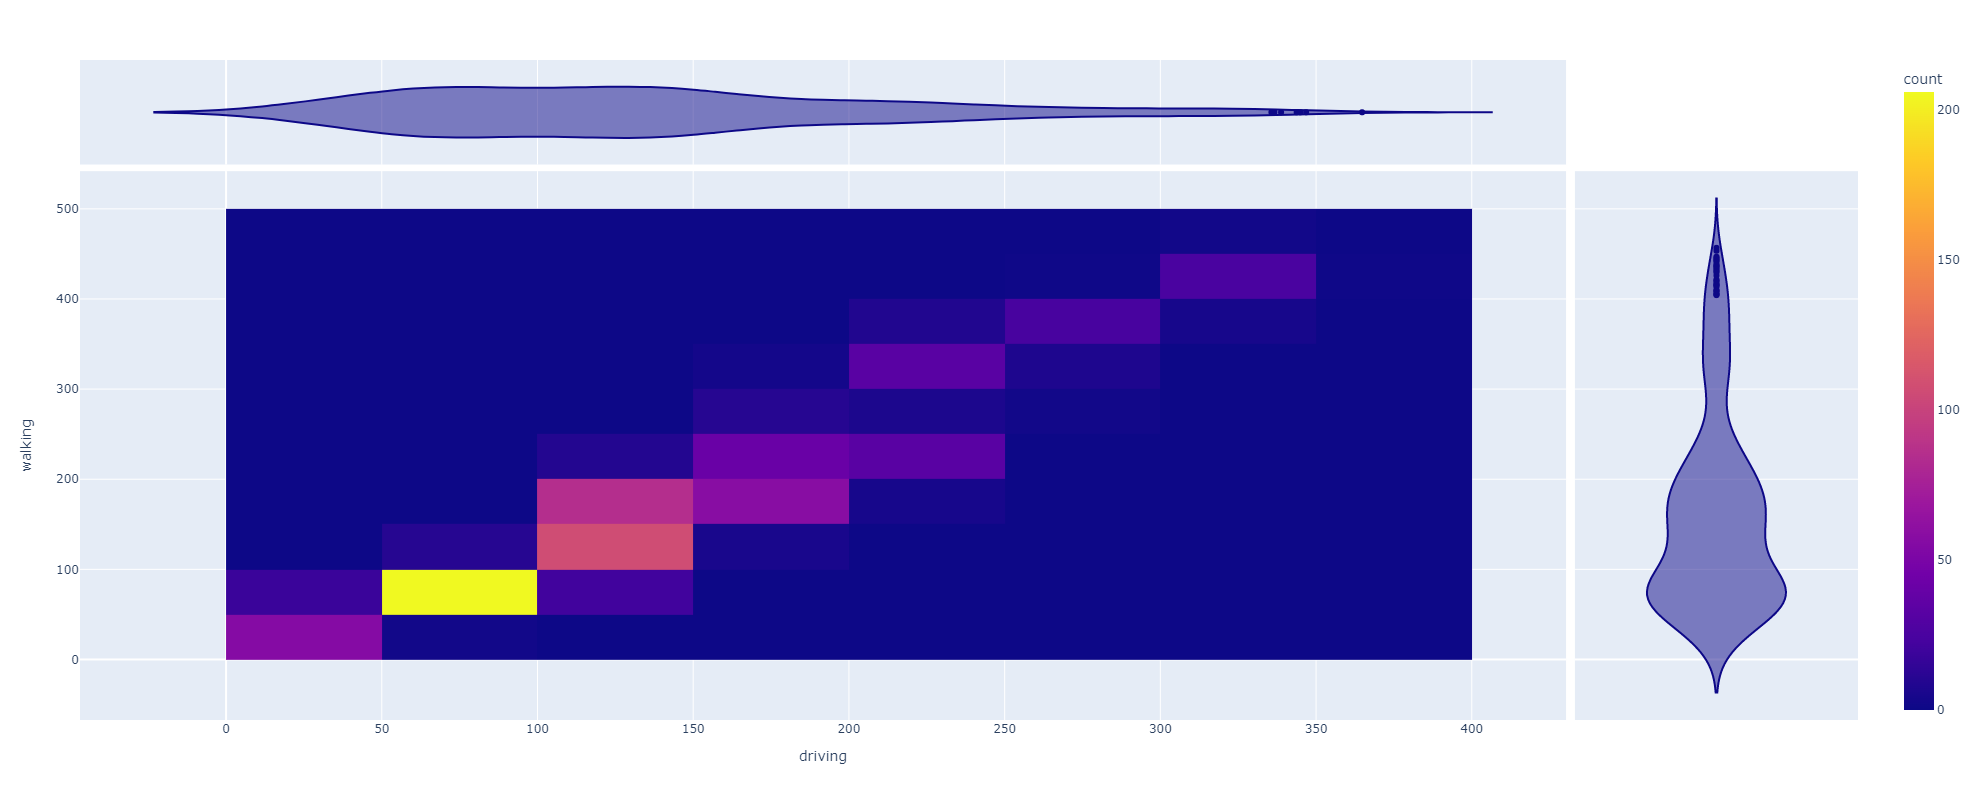

In [8]:
fig = helper.px.density_heatmap(
    data_frame=df,
    x='driving',
    y='walking',
    marginal_x="violin",
    marginal_y="violin",
    width=800,
    height=800
)

fig.show()
